In [14]:
import numpy as np
from keras.layers import Input, Add, Conv2D, BatchNormalization, ReLU, LeakyReLU, UpSampling2D, Concatenate, AveragePooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
%matplotlib inline

import keras.backend as K

In [2]:
img_rows = 128
img_cols = 128
channels = 3
img_shape = (img_rows, img_cols, channels)

In [12]:
def content_encoder(shape):
    X_input = Input(shape=shape)
    
    X = Conv2D(64, kernel_size=1, strides=1, padding='same')(X_input)
    X = InstanceNormalization()(X)
    X = ReLU()(X)
    
    X = Conv2D(128, kernel_size=1, strides=2, padding='same')(X)
    X = InstanceNormalization()(X)
    X = ReLU()(X)
    
    X = Conv2D(256, kernel_size=1, strides=2, padding='same')(X)
    X = InstanceNormalization()(X)
    X = ReLU()(X)
    
    X = Conv2D(512, kernel_size=1, strides=2, padding='same')(X)
    X = InstanceNormalization()(X)
    X = ReLU()(X)
    
    X_shortcut = X
    
    X = Conv2D(512, kernel_size=1, strides=1, padding='same')(X)
    X = InstanceNormalization()(X)
    X = Add()([X_shortcut, X])
    X = ReLU()(X)
    
    X_shortcut = X
    
    X = Conv2D(512, kernel_size=1, strides=1, padding='same')(X)
    X = InstanceNormalization()(X)
    X = Add()([X_shortcut, X])
    X = ReLU()(X)
    
    model = Model(inputs=X_input, outputs=X, name='content_encoder')
    return model

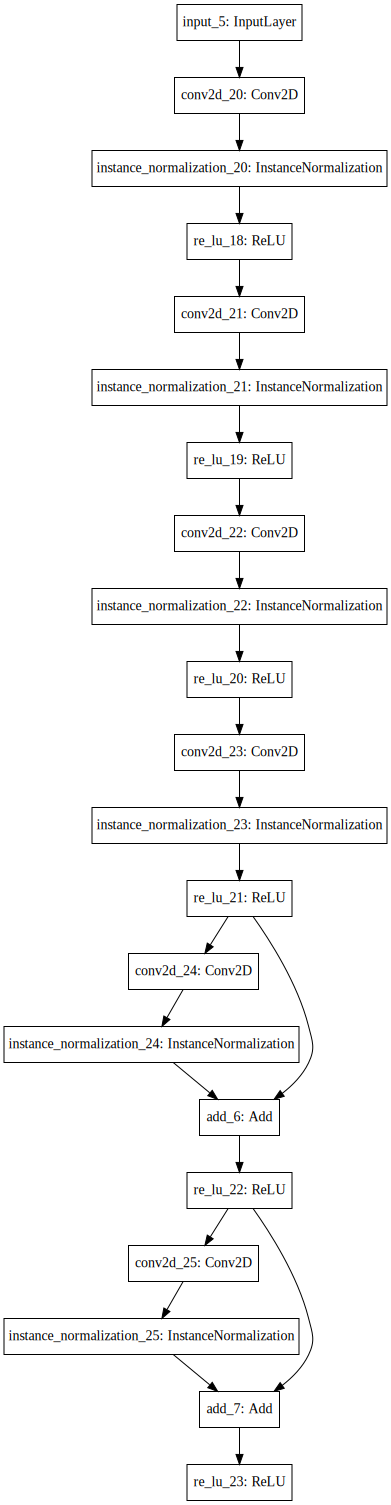

In [13]:
model = content_encoder((128, 128, 3))
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [15]:
def class_encoder_k(shape):
    X_input = Input(shape=shape)
    
    X = Conv2D(64, kernel_size=1, strides=1, padding='same')(X_input)
    X = ReLU()(X)
    
    X = Conv2D(128, kernel_size=1, strides=2, padding='same')(X)
    X = ReLU()(X)
    
    X = Conv2D(256, kernel_size=1, strides=2, padding='same')(X)
    X = ReLU()(X)
    
    X = Conv2D(512, kernel_size=1, strides=2, padding='same')(X)
    X = ReLU()(X)
    
    X = Conv2D(1024, kernel_size=1, strides=2, padding='same')(X)
    X = ReLU()(X)
    
    X = AveragePooling2D()(X)
    
    X = Dense(512)(X)
    
    return X

In [16]:
def class_encoder():
    for i in range (0, k):
        total = np.add(total, class_encoder_k)
    mean = np.mean(total, axis=0)
    return mean

In [ ]:
def decoder():
    